# 제과점 데이터 시각화

## 파일 다운로드

In [ ]:
# !git clone https://github.com/Soyoung-Yoon/data_03

## 한글 폰트 사용구성

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False 
# plt.rc('font', family='NanumGothic')
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic') 

# sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='whitegrid')
# sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

## 제과점 오픈 프로젝트

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 파일 읽어오기

- csv 파일 : `pd.read_csv('파일이름', encoding='cp949', low_memory=False)` 
   - encoding='cp949' : 한글이 포함되어 있는 경우 encoding 방식을 지정
   - low_memory=False : column에 여러 type의 데이터가 섞여 있으면 DtypeWarning이 발생하며 이때, dtype option으로 타입을 명시해주거나 low_memory=False를 사용한다.


In [3]:
# [4-1] 제과점에 대한 파일 './data_03/bread_data.csv'을 
# encoding='cp949' 를 사용하여 읽어와 df라는 이름을 붙인다
# low_memory=False 또는 dtype={'건물소유구분명': object, '전통업소지정번호': object}를 사용하여 Warning를 제거할 수 있음
df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', low_memory=False)
df.head()

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,제과점영업,07_22_18_P,3600000,3600000-121-2013-00002,20130201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,146.40,NaN,NaN,NaN,NaN
1,2,제과점영업,07_22_18_P,3600000,3600000-121-2013-00005,20130318,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,165.00,NaN,NaN,NaN,NaN
2,3,제과점영업,07_22_18_P,3600000,3600000-121-2013-00008,20130417,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,101.25,NaN,NaN,NaN,NaN
3,4,제과점영업,07_22_18_P,3620000,3620000-121-1998-00020,19980327,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,74.31,NaN,NaN,NaN,NaN
4,5,제과점영업,07_22_18_P,3620000,3620000-121-1986-00015,19980515,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,89.04,NaN,NaN,NaN,NaN


### 데이터 구조 확인

- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환
- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함

In [4]:
# [4-2] df의 행, 열의 개수를 확인한다
print(df.shape)

(52680, 48)


In [5]:
# [4-3] df의 첫 1개 열을 출력해 확인한다
df.head(1)

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,제과점영업,07_22_18_P,3600000,3600000-121-2013-00002,20130201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,146.4,NaN,NaN,NaN,NaN


In [6]:
# [4-4] df의 행, 열에 대한 개수, 각 열 별 데이터 개수 및 dtype, 
# 메모리 사용량을 확인합니다.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52680 entries, 0 to 52679
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           52680 non-null  int64  
 1   개방서비스명       52680 non-null  object 
 2   개방서비스id      52680 non-null  object 
 3   개방자치단체코드     52680 non-null  int64  
 4   관리번호         52680 non-null  object 
 5   인허가일자        52680 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     52680 non-null  int64  
 8   영업상태명        52680 non-null  object 
 9   상세영업상태코드     52680 non-null  int64  
 10  상세영업상태명      52680 non-null  object 
 11  폐업일자         33669 non-null  float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        31967 non-null  object 
 16  소재지면적        49047 non-null  object 
 17  소재지우편번호      50885 non-null  float64
 18  소재지전체주소      52513 non-null  object 
 19  도로명전

- DataFrame의 한 개의 column은 Series이다.
    + DataFrame[컬럼명] : 컬럼 1개를 Series로 반환함
    + DataFrame[[컬럼명1, 컬럼명2, ...]] : 컬럼 목록에 있는 컬럼을 가져옴
        + 컬럼 목록에 1개의 컬럼만 있어도 DataFrame이 반환됨
- `Series.value_counts()` : 데이터 별 개수를 Series로 반환
    + NA Value가 있다면 불포함

In [7]:
# [4-5] df의 '상세영업상태명'에 대해 값별 개수를 구합니다.
df['상세영업상태명'].value_counts()

폐업    33669
영업    19011
Name: 상세영업상태명, dtype: int64

In [8]:
# [4-6] df의 '상세영업상태코드'에 대해 값별 개수를 구합니다.
# 1: 영업, 2: 폐업
df['상세영업상태코드'].value_counts()

2    33669
1    19011
Name: 상세영업상태코드, dtype: int64

In [9]:
# [4-7] df의 컬럼 중에 
# '인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명'만 가져옵니다.
# 이름을 bread로 정하고, 처음부터 3개 행을 출력해 봅니다.
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업


### 파생정보 추가

- Series의 str Accessor 사용
    + 세부 내용 : https://pandas.pydata.org/docs/reference/series.html#string-handling 
    + `Series.str.split()` : whitespace(공백, 탭 등)을 기준으로 문자열 분리
        + 예)  ‘서울특별시 종로구 …’  => [서울특별시, 종로구, …]
    + `Series.str[0]` : Series가 여러 개의 요소가 있는 경우 그 첫 번째 요소 
- `Series.unique()` : 중복 데이터의 제거 후 배열로 반환, NA Value가 있다면 포함

In [10]:
# [4-8] bread 의 '소재지전체주소' 중 시/도에 대한 정보(목록)를 추출합니다.
bread['소재지전체주소'].str.split().str[0].unique()

array(['광주광역시', '부산광역시', '경상북도', nan, '인천광역시', '충청남도', '경기도', '충청북도',
       '제주특별자치도', '서울특별시', '대전광역시', '대구광역시', '울산광역시', '전라남도', '전라북도',
       '경상남도', '강원도', '세종특별자치시', '사당역4호선'], dtype=object)

Boolean indexing 사용하여 조건에 맞는 데이터 가져오기
- `DataFrame.loc[조건, :]`
- `DataFrame[조건]`
- 조건은 boolean dtype이어야 하며 행의 수와 같아야 함
- 복잡한 조건 작성
    + (조건1) | (조건2)  : 조건1 또는 조건2를 만족하는 데이터
    + (조건1) & (조건2)  : 조건1, 조건2 모두 만족하는 데이터
    + ~(조건) : 조건이 거짓인 데이터

In [11]:
# [4-9] bread에서 소재지전체주소의 처음이 '서울특별시'이면서,
# '업태구분명'이 '제과점영업'인 것만 추출합니다.
bread[(bread['소재지전체주소'].str.split().str[0] == '서울특별시') & (bread['업태구분명'] == '제과점영업')]

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
1055,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업
1056,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업
1057,20021011,1,NaN,서울특별시 은평구 녹번동 278-1번지 (108호),신라명과(역촌현대점),제과점영업
1058,20011015,1,NaN,서울특별시 은평구 불광동 631-1번지 (지하1층)대호상가아파트,브르망,제과점영업
1059,20050406,1,NaN,서울특별시 중랑구 중화동 288-27,케잌하우스밀레,제과점영업
...,...,...,...,...,...,...
52664,20201218,2,20201225.0,서울특별시 서초구 반포동 19-3 지하1층,나폴레옹과자점,제과점영업
52665,20201218,2,20201225.0,서울특별시 서초구 반포동 19-3 신세계 강남점 지하1층,르몽블랑,제과점영업
52670,20210119,2,20210220.0,서울특별시 서초구 반포동 19-3 신세계백화점 지하1층,리암스(Liam's),제과점영업
52672,20210125,2,20210215.0,서울특별시 강남구 압구정동 494 갤러리아백화점,유한회사 카페노티드(한시적),제과점영업


In [12]:
# [4-10] df, bread의 행/열 정보를 확인합니다.
print(df.shape, bread.shape, sep='\n')

(52680, 48)
(52680, 6)


DataFrame에 새로운 컬럼 추가
- `DataFrame['컬럼명'] = 데이터`
- 데이터의 개수는 기존 다른 컬럼의 행 개수와 같아야 함

In [13]:
# [4-11] bread의 '소재지전체주소'에서 '구명', '동명'을 추출하여 
# bread에 새로운 컬럼으로 등록합니다.
pd.options.mode.chained_assignment = None

address = bread['소재지전체주소'].str.split()
bread['구명'] = address.str[1]
bread['동명'] = address.str[2]

# pd.options.mode.chained_assignment = 'warn'
del address
# bread의 컬럼명을 출력해 '구명', '동명'이 추가되었는지 확인함
bread.columns

Index(['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명'], dtype='object')

- Accessor 연습 LAB : https://colab.research.google.com/drive/1tkrP-1VWZYZ1Zl_9KrlkPBpVHWBMUlCy
- Accessor 연습 Teacher : https://colab.research.google.com/drive/1Szy5ZjK7hM6E7utgPIbAgwDAxcWWpwO5columns

### 결측치 확인/처리

결측치는 값이 없음을 나타냄 
- NaN, NaT, None 등으로 표기되며, NA Value, Missing Value 라고 함

결측치 확인
   - DataFrame.isna() : 결측치에 대해 True, 아니면 False
   - DataFrame.isnull() : DataFrame.isna()와 동일함
   - DataFrame.notna() : 결측치가 아닌 것에 대해 True, 결측치면 False
   - DataFrame.notnull() : DataFrame.isnull()과 동일함
   - Series에도 결측치 확인을 위한 isna() ~ notnull()의 메서드 있음

DataFrame.isna().sum() : 결측치에 대해 컬럼별 개수

In [14]:
# [4-12] bread의 각 컬럼별 결측치의 개수를 확인합니다.
bread.isna().sum()

인허가일자           0
상세영업상태코드        0
폐업일자        19011
소재지전체주소       167
사업장명            0
업태구분명           6
구명            167
동명            167
dtype: int64

In [15]:
bread[bread['폐업일자'].isna()]

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업,서구,화정동
3,19980327,1,NaN,광주광역시 북구 운암동 110-5번지,파리바게트광주동운점,제과점영업,북구,운암동
4,19980515,1,NaN,광주광역시 북구 오치동 578-4번지 1층,씨앤씨베이커리카페,제과점영업,북구,오치동
...,...,...,...,...,...,...,...,...
19006,20201209,1,NaN,인천광역시 중구 운서동 2850-8 그랜드하얏트인천 웨스트타워 1층,로비샵,제과점영업,중구,운서동
19007,20210126,1,NaN,경기도 남양주시 와부읍 도곡리 985 덕소두산위브아파트 상가동 2층 220호,크로플아셀라스토리(덕소점),제과점영업,남양주시,와부읍
19008,20210126,1,NaN,"경기도 남양주시 다산동 6205-3 강산타워 주건축물제1동 105,106호",파리바게뜨 강산타워점,제과점영업,남양주시,다산동
19009,20201208,1,NaN,부산광역시 해운대구 반송동 872 삼한그린타운2차,라두스 쌀빵,제과점영업,해운대구,반송동


결측치 채우기
- DataFrame.fillna(값) : 결측치를 특정 값으로 채움

데이터 타입 변경 방법
- Series.astype(타입)
- 타입 표시 방법 : 'int', 'int32', 'int64', 'float', 'str', 'category',  ... 등의 문자열로 지정 
- np.int16, np.float32, np.datetime64, ... 등의 numpy 타입으로 지정
- numpy 타입으로 지정하기 위해서는  ```import numpy as np```  를 먼저 실행하여야 함

In [16]:
# [4-13] bread2의 '폐업일자'에 대해 결측치인 것을 0.0으로 채우기 한 뒤, 
# 데이터 타입을 'int64'로 수정합니다.
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype(np.int64)

In [17]:
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20130201,1,0,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동
1,20130318,1,0,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동
2,20130417,1,0,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업,서구,화정동


In [18]:
# [4-14] bread의 전체 결측치의 개수를 하나의 정수로 확인합니다.
bread.isna().sum().sum()

507

DataFrame에서 컬럼을 제거 함
- DataFrame.drop(columns=['컬럼명1', '컬럼명2', ...])
- DataFrame.drop(['컬럼명1', '컬럼명2', ...], axis=1)

In [19]:
# [4-15] bread에서 '소재지전체주소' 및 '업태구분명' 컬럼을 제거한 뒤, shape을 확인합니다.
bread.drop(columns=['소재지전체주소', '업태구분명'])
bread.shape

(52680, 8)

In [20]:
# [4-16] bread의 첫 3개 행을 확인합니다.
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20130201,1,0,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동
1,20130318,1,0,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동
2,20130417,1,0,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업,서구,화정동


컬럼이름 변경하기
- DataFrame.rename(columns={'변경전이름':'변경후이름', ...})
- DataFrame.rename({'변경전이름':'변경후이름', ...}, axis=1)

In [21]:
# [4-17] bread의 '상세영업상태코드'라는 컬럼명을 '상태코드'로 변경한 뒤,
# 첫 2개의 행을 확인합니다.
bread.rename(columns={'상세영업상태코드':'상태코드'}, inplace=True)
bread.head(2)

,인허가일자,상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20130201,1,0,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동
1,20130318,1,0,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동


CSV 파일로 저장하기
- DataFrame.to_csv('파일이름', index=False) : index를 제외한 내용을 csv 파일로 저장함

In [22]:
# [4-18] bread를 'bread_after.csv' 파일로 index를 제외하고 저장합니다.
bread.to_csv('./data_03/bread.csv', index=False)

In [23]:
# [4-19] 'bread_after.csv' 파일을 읽어 bread라는 이름으로 저장합니다.
bread = pd.read_csv('./data_03/bread.csv')

In [24]:
bread.head()

,인허가일자,상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
0,20130201,1,0,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동
1,20130318,1,0,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동
2,20130417,1,0,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업,서구,화정동
3,19980327,1,0,광주광역시 북구 운암동 110-5번지,파리바게트광주동운점,제과점영업,북구,운암동
4,19980515,1,0,광주광역시 북구 오치동 578-4번지 1층,씨앤씨베이커리카페,제과점영업,북구,오치동


### 설립년도, 폐업년도 분석

Series의 연산
- Series는 스칼라값과 연산 시 각 값과 스칼라 값의 연산이 이루어짐
- 결과는 Series가 됨

In [25]:
bread['인허가일자'].replace({199501:19950101,199608:19960801 }, inplace=True)

In [26]:
# [4-20] bread에 '설립년도' 및 '폐업년도' 컬럼을 추가합니다.
# '인허가일자'//10000, '폐업일자 // 10000 을 사용하여 구합니다.
# 두 개의 컬럼이 추가된 bread의 첫 2개 행을 확인합니다.
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
bread.head(2)

,인허가일자,상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명,설립년도,폐업년도
0,20130201,1,0,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동,2013,0
1,20130318,1,0,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동,2013,0


In [27]:
# [4-21] bread에 '영업기간' 컬럼을 추가합니다
# '영업기간'은 '상태코드'가 1(=영업)인 경우 2021 - 설립년도 -1
# '상태코드'가 2(=폐업)인 경우 폐업년도 - 설립년도 + 1로 계산합니다.
base_year = 2023
bread.loc[bread['상태코드'] == 1, '영업기간'] = base_year - bread['설립년도'] + 1
bread.loc[bread['상태코드'] == 2, '영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
bread.head(2)

,인허가일자,상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명,설립년도,폐업년도,영업기간
0,20130201,1,0,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업,서구,치평동,2013,0,11.0
1,20130318,1,0,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업,서구,유촌동,2013,0,11.0


Series를 DataFrame으로 만들기
- pd.DataFrame(Series)
- Series.to_frame()

DataFrame의 index 정렬하기
- DataFrame.sort_index() : 오름차순 정렬
- DataFrame.sort_index(ascending=False) : 내림차순 정렬

DataFrame의 전치행렬 구하기
- DataFrame.T


In [28]:
# [4-22] bread의 '설립년도'별 데이터 수sort_index별로 정렬하고, 
# DataFrame으로 변경하여 전치행렬을 구해 temp1 이름을 부여해 출력합니다.
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().transpose()
temp1

,0,1883,1922,1931,1952,1959,1960,1961,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,2,1,1,1,1,1,1,2,3,1,...,1718,1596,1919,2430,2724,2598,2488,2448,2232,1811


In [29]:
# [4-23] bread의 '폐업년도'별 데이터 수를 구해 년도별로 정렬하고, 
# DataFrame으로 변경하여 전치행렬을 구해 temp2 이름을 부여해 출력합니다.
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp2

,0,1984,1988,1989,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
폐업년도,19011,1,2,1,33,4,35,32,23,52,...,1939,1587,1530,1683,1905,2501,2190,2253,2100,1333


여러 개의 데이터프레임 합치기
- pd.concat([DataFrame1, DataFrame2, ...])
- DataFrame의 목록에 있는 순서대로 위 -> 아래 방향으로 합쳐 한 개 DataFrame 반환

In [30]:
# [4-23] temp1, temp2를 합쳐서 temp라고 이름 붙입니다.
temp = pd.concat([temp1, temp2])
temp

,0,1883,1922,1931,1952,1959,1960,1961,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,...,1718,1596,1919,2430,2724,2598,2488,2448,2232,1811
폐업년도,19011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1939,1587,1530,1683,1905,2501,2190,2253,2100,1333


In [31]:
# [4-24] temp의 결측치를 0으로 채우기 한 뒤, 'int64'로 변경합니다.
temp = temp.fillna(0).astype(np.int64)
temp

,0,1883,1922,1931,1952,1959,1960,1961,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,2,1,1,1,1,1,1,2,3,1,...,1718,1596,1919,2430,2724,2598,2488,2448,2232,1811
폐업년도,19011,0,0,0,0,0,0,0,0,0,...,1939,1587,1530,1683,1905,2501,2190,2253,2100,1333


### 그래프 그리기

In [32]:
data = temp.iloc[:,1:].T
data.iloc[data['설립년도'].argmax(),:]

설립년도    2807
폐업년도    2027
Name: 2010, dtype: int64

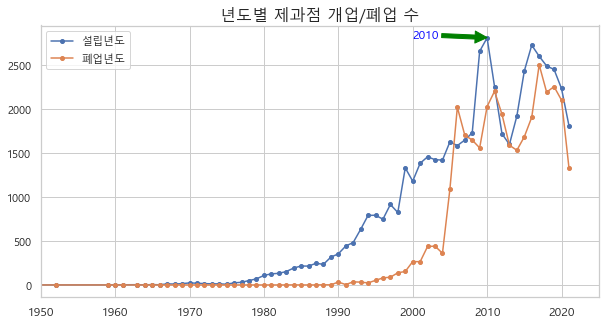

In [33]:
# [4-25] 년도별 argmax, 폐업에 대한 선 그래프 그리기
data.plot.line(figsize=(10,5), marker='o', markersize=4)
plt.xlim(1950, 2025)
plt.xticks(range(1950, 2025, 10), fontsize=12)
plt.title('년도별 제과점 개업/폐업 수', fontsize=16)
plt.annotate('2010', (2010, 2810), (2000, 2800), fontsize=12, color='blue', arrowprops={'color':'green'})
plt.grid(True)

plt.show()

### 평균 영업기간 분석

특정 문자열이 포함된 행 가져오기
- Series.str.contains(문자열) : 문자열이 포함된 행은 True, 아니면 False인 Series 반환
- DataFrame.loc[조건, :] : 조건이 True인 행만 가져오기

In [34]:
# [4-27] bread에서 '사업장명' 컬럼을 사용하여 
# '뚜레쥬르' 이름인 곳을 뽑아 tous로 이름 붙입니다.
bread = bread.loc[bread['소재지전체주소'].str.split().str[0] == '서울특별시', :]
tous = bread.loc[bread['사업장명'].str.contains('뚜레쥬르'),:]
paris = bread.loc[bread['사업장명'].str.contains('파리'),:]

통계값 알아보기
- Series.count() : 개수
- Series.sum() : 합계
- Series.mean() : 평균
- Series.std() : 표준편차
- Series.var() : 분산
- Series.median() : 중앙값
- Series.mode() : 최빈값
- Series.cumsum() : 누적합
- Series.quantile([0.25, 05, 0.75]) : 분위수

In [35]:
# [4-28] 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도'] >= 2000) & (paris['상태코드'] == 1), '영업기간']
temp2 = tous.loc[(tous['설립년도'] >= 2000) & (tous['상태코드'] == 1), '영업기간']
# temp1, temp2의 평균을 구해 이름을 comp로 하는 DataFrame으로 만듭니다. 
# index => ['파리바게트', '뚜레쥬르'], columns => ['영업']
comp = pd.DataFrame(data=(temp1.mean(), temp2.mean()), index=['파리바게트', '뚜레쥬르'], columns=['영업'])
comp

,영업
파리바게트,14.337662
뚜레쥬르,11.796296


In [36]:
# [4-29] 설립년도 2000년 이후이면서 폐업한 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도'] >= 2000) & (paris['상태코드'] == 2), '영업기간']
temp2 = tous.loc[(tous['설립년도'] >= 2000) & (tous['상태코드'] == 2), '영업기간']
# temp1, temp2의 평균을 구해 comp에 '폐업' 컬럼으로 추가합니다.
comp['폐업'] = pd.DataFrame(data=(temp1.mean(), temp2.mean()), index=['파리바게트', '뚜레쥬르'])
comp

,영업,폐업
파리바게트,14.337662,7.686869
뚜레쥬르,11.796296,7.309028


In [37]:
# [4-30] 파리바게트, 뚜레쥬르가 아닌 다른 사업장에 대한 정보를 찾아 other로 이름 붙입니다.
other = bread.loc[~bread['사업장명'].str.contains('뚜레쥬르|파리바게트', regex=True), :]
# other의 행, 열 정보를 확인합니다.
print(other.shape, other.columns, sep='\n')

(11215, 11)
Index(['인허가일자', '상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명', '설립년도',
       '폐업년도', '영업기간'],
      dtype='object')


In [38]:
# [4-31] other의 2000년 이후 설립된 곳의 영업, 폐업 사업장을 구한 뒤 
# temp1, temp2 이름을 붙입니다.
temp1 = other.loc[(other['설립년도'] >= 2000) & (other['상태코드'] == 1), '영업기간']
temp2 = other.loc[(other['설립년도'] >= 2000) & (other['상태코드'] == 2), '영업기간']
# temp1, temp2의 평균을 구해 comp 에 '나머지' 행으로 추가합니다.
comp.loc['나머지'] = [temp1.mean(), temp2.mean()]
comp

,영업,폐업
파리바게트,14.337662,7.686869
뚜레쥬르,11.796296,7.309028
나머지,9.194837,4.720285


### 폐업 비율 분석

In [39]:
# [4-32] paris에서 영업 중인 곳에 대해 '시군구명'별 개수를 구해 DataFrame으로 변환하고
# temp로 이름 붙인 뒤, 첫 2개 행을 출력한다
temp = paris.loc[paris['상태코드'] == 1, '구명'].value_counts().to_frame()
temp.head(2)

,구명
강남구,62
송파구,49


 DataFrame.reset_index()
 - index의 내용을 columns로 이동함

In [40]:
# [4-33] paris에서 폐업한 곳에 대해 '구명'별 개수를 구해 
# temp에 '폐업'이라는 컬럼으로 추가하고,
# reset_index()를 사용하여 index를 columns로 사용되도록 한다. (temp2로 다시 저장)
temp['폐업'] = paris.loc[paris['상태코드'] == 2, '구명'].value_counts()
temp2 = temp.reset_index()
temp2.head()

,index,구명,폐업
0,강남구,62,35
1,송파구,49,25
2,서초구,43,31
3,영등포구,41,25
4,강서구,35,14


DataFrame의 모든 컬럼이름 변경
- DataFrame.columns = [컬럼이름1, 컬럼이름2, ...]
- 기존 컬럼의 개수와 같아야 함

In [41]:
# [4-34] temp2의 컬럼명을 ['구', '영업', '폐업']으로 변경한다
temp2.columns = ['구', '영업', '폐업']
# temp2의 첫 2개 행을 출력한다
temp2.head(2)

,구,영업,폐업
0,강남구,62,35
1,송파구,49,25


In [42]:
# [4-35] temp2에 '폐업비율' 컬럼을 추가한다
# 폐업비율 = 폐업 / (폐업 + 영업) * 100
temp2['폐업비율'] = temp2['폐업'] / (temp2['폐업'] + temp2['영업']) * 100
# temp2의 첫 3개 행을 출력한다
temp2.head(3)

,구,영업,폐업,폐업비율
0,강남구,62,35,36.082474
1,송파구,49,25,33.783784
2,서초구,43,31,41.891892


데이터 정렬
- DataFrame.sort_values('컬럼이름') : 주어진 컬럼을 기준으로 데이터를 오름차순 정렬
- DataFrame.sort_values('컬럼이름', ascending=False) : 내림차순 정렬
- DataFrame.sort_values(['컬럼이름1', '컬럼이름2'..]) : 다차 정렬

In [43]:
temp2 = temp2.fillna(0)
# temp2 = temp2.drop(temp2.loc[temp2['폐업'] == 0,:].index)

In [44]:
# [4-36] temp2를 폐업비율을 기준으로 오름차순 정렬하여 TOP5를 출력한다
# 폐업비율이 가장 작은 곳은 은평구, 동대문구 ... 등으로 정보를 찾게 됨
temp2.sort_values(by='폐업비율', ascending=True).head(5)

,구,영업,폐업,폐업비율
19,도봉구,21,4,16.000000
5,은평구,33,7,17.500000
12,동대문구,27,6,18.181818
14,성동구,27,10,27.027027
4,강서구,35,14,28.571429


Series.quantile([rate1, rate2, ...])
- 데이터를 순서대로 나열했을 때, 특정 비율 위치의 값을 구함
- 0 : 가장 작은 것의 값
- 1 : 가장 큰 것의 값

Series.quantile([0.3, 0.9])
- 0.3 : 하위 30% 위치
- 0.9 : 상위 10% 위치 

In [45]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
s.quantile([0, 0.5, 1])

0.0     1.0
0.5     5.5
1.0    10.0
dtype: float64

In [46]:
# [4-37] temp에서 폐업비율 하위 30%인 곳을 구하시오.
temp2.loc[temp2['폐업비율'] <= temp2['폐업비율'].quantile(0.3), :].sort_values(by='폐업비율')

,구,영업,폐업,폐업비율
19,도봉구,21,4,16.000000
5,은평구,33,7,17.500000
12,동대문구,27,6,18.181818
14,성동구,27,10,27.027027
4,강서구,35,14,28.571429
23,강북구,17,7,29.166667
8,양천구,32,14,30.434783
9,구로구,31,14,31.111111


In [47]:
# [4-38] temp에서 폐업비율 상위 20%인 곳을 구하시오.
temp2.loc[temp2['폐업비율'] >= temp2['폐업비율'].quantile(0.8), :].sort_values(by='폐업비율', ascending=False)

,구,영업,폐업,폐업비율
24,종로구,14,15,51.724138
11,강동구,29,30,50.847458
18,광진구,21,19,47.500000
21,금천구,18,14,43.750000
16,마포구,26,20,43.478261


### 시각화

In [48]:
## 그래프만 그리는 경우 목차에서 1, 2 번 + DataFrame 만들기 수행하신 뒤 다음을 수행하시면 됩니다.

In [49]:
# [4-39] 파리바게트의 구별 영업, 폐점장 수 구하기
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :]
data = pd.DataFrame()
data['영업'] = paris.loc[paris['상태코드']==1, '구명'].value_counts().to_frame()
data['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
data.head()

,영업,폐업
강남구,59,28
송파구,49,20
서초구,38,24
영등포구,37,22
강서구,34,13


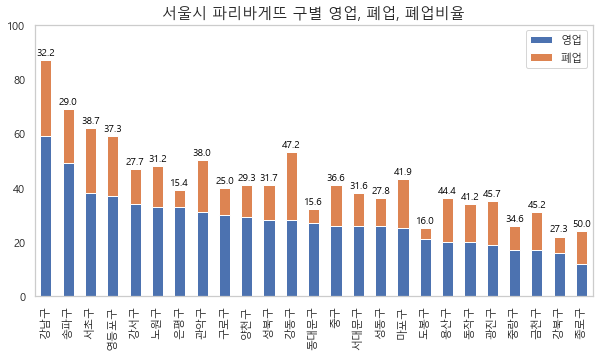

In [50]:
# [4-40] 누적 bar 그래프 그리기
data.plot.bar(stacked=True, figsize=(10,5), grid=False)
plt.ylim(0,100)
plt.title('서울시 파리바게뜨 구별 영업, 폐업, 폐업비율', fontsize=15)

y = round(data['폐업'] / (data['폐업'] + data['영업']) * 100, 1)
pos = (data['폐업'] + data['영업']) + 1
for i in range(len(data)):
    plt.text(i, pos[i], y[i],
             fontsize=10, color='black',
             horizontalalignment='center', verticalalignment='bottom')
plt.show()

In [51]:
# [4-41] bread를 사용하여 은평구에서 영업 중인 동별 빵집 개수를 구해 봅니다
s = bread.loc[(bread['구명'] == '은평구') & (bread['상태코드'] == 1), '동명'].value_counts()
s

진관동    30
응암동    24
대조동    20
불광동    17
신사동    17
역촌동    16
갈현동    15
녹번동    12
구산동    11
증산동     8
수색동     3
Name: 동명, dtype: int64

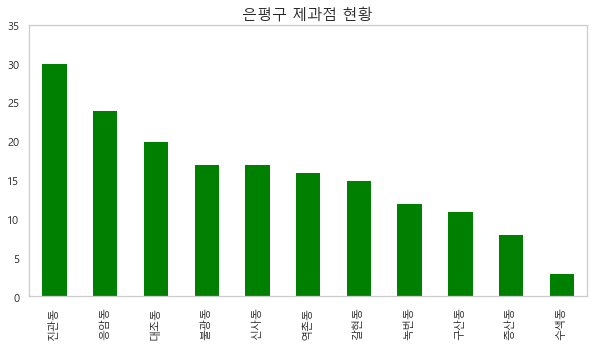

In [52]:
# [4-42] 은평구의 동별 빵집 개수를 그래프로 표시해 봅니다.
s.plot.bar(figsize=(10,5), color='green')
plt.title('은평구 제과점 현황', fontsize=15)

plt.grid(False)
plt.ylim(0, 35)
plt.show()

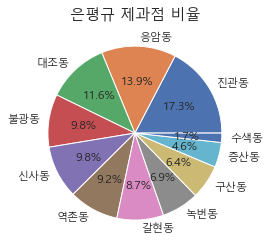

In [57]:
# [4-43] 은평구의 동별 빵집 비율을 원행 그래프로 표시해 봅니다.
s.plot.pie(autopct='%.1f%%', label='')
plt.title('은평규 제과점 비율', fontsize=15)
plt.show()